In [28]:
# 引入Python包，在jupyter notebook 运行后可以直接输出多个变量 注意大小写
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [29]:
from keras.datasets import imdb

In [30]:
(train_data, train_lables), (test_data, test_lables) = imdb.load_data(num_words=10000)

train_data 和 test_data 这两个变量都是评论组成的列表，每条评论又是单词索引组成
的列表（表示一系列单词）。train_labels 和 test_labels 都是 0 和 1 组成的列表，其中 0
代表负面（negative），1 代表正面（positive）

In [31]:
train_data.shape
test_data.shape
train_data.ndim

(25000,)

(25000,)

1

In [32]:
train_data[:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [33]:
train_lables.shape
train_lables[0]

(25000,)

1

In [34]:
max([max(sequence) for sequence in train_data])

9999

In [35]:
len(train_data[0])

218

In [36]:
len(train_data[1])

189

imdb_word_index.json 单词表是一个单词和索引的键值对
{"fawn": 34701, "tsukino": 52006, "nunnery": 52007, "sonja": 16816, "vani": 63951, "woods": 1408,

In [37]:
word_index = imdb.get_word_index()

In [40]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [41]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [46]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]]) # 为什么要减3

In [47]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [48]:
import numpy as np

In [49]:
def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):  # enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中
        result[i, sequence] = 1.
    return result

In [52]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [53]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [55]:
x_train.shape
x_train.ndim

x_test.shape
x_test.ndim

(25000, 10000)

2

(25000, 10000)

2

In [66]:
y_train = np.asarray(train_lables).astype('float32')
y_test = np.asarray(test_lables).astype('float32')

In [67]:
y_train
y_test

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [120]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

In [121]:
from keras import optimizers
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# network.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [122]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [123]:
history = network.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 162us/step - loss: 0.5371 - accuracy: 0.7898 - val_loss: 0.4137 - val_accuracy: 0.8697
Epoch 2/4
15000/15000 [==============================] - 2s 142us/step - loss: 0.3312 - accuracy: 0.8980 - val_loss: 0.3177 - val_accuracy: 0.8833
Epoch 3/4
15000/15000 [==============================] - 2s 137us/step - loss: 0.2387 - accuracy: 0.9227 - val_loss: 0.2857 - val_accuracy: 0.8866
Epoch 4/4
15000/15000 [==============================] - 2s 138us/step - loss: 0.1891 - accuracy: 0.9369 - val_loss: 0.2858 - val_accuracy: 0.8846


In [112]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [100]:
import matplotlib.pyplot as plt

In [113]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1, len(loss_values) + 1)

Text(0.5, 1.0, 'Training and Validation loss')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

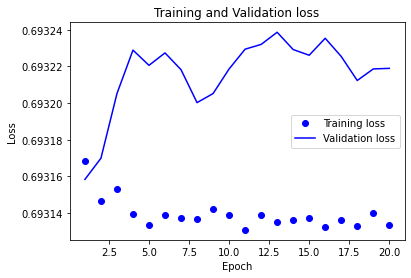

In [114]:
plt.plot(epoch, loss_values, 'bo', label='Training loss')
plt.plot(epoch, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Text(0.5, 1.0, 'Training and Validation acc')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

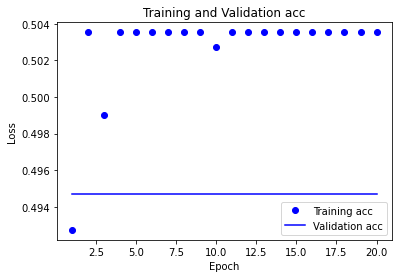

In [115]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.clf()
plt.plot(epoch, acc_values, 'bo', label='Training acc')
plt.plot(epoch, val_acc_values, 'b', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [116]:
results = network.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 114us/step


In [117]:
results

[0.6931619606018067, 0.5]

In [118]:
network.predict(x_test)

array([[0.49728376],
       [0.49728376],
       [0.49728376],
       ...,
       [0.49728376],
       [0.49728376],
       [0.49728376]], dtype=float32)

In [119]:
x_test


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])